# Practical Assignment 2: Exploratory Analysis of Teacher Ratings

---

## **Submission Details**

| Field | Details |
|---|---|
| **Name** | Ayushkar Pau |
| **ID** | GF202343142 |
| **Subject** | Statistical Foundation of Data Science (CSU1658) |
| **Date** | October 10, 2025 |
| **Repo** |[View My Repository](https://github.com/Ayushkar-Pau/Statistical-Foundation-of-Data-Sciences) |

---

## **Assignment Overview**

This notebook addresses the second practical assignment, which focuses on performing an exploratory data analysis on the teacher rating dataset. The primary tasks include identifying the dataset type, producing descriptive statistics and investigating potential differences in beauty scores and tenure status between genders.

# Practical Assignment 2: Exploratory Analysis of Teacher Ratings

## **Introduction & Objectives**

This notebook addresses the second practical assignment, focusing on an exploratory data analysis of the teacher ratings dataset. The primary objective is to understand the nature of the data, calculate key descriptive statistics, and investigate potential relationships between instructor attributes like beauty, gender, and tenure status.

---

### **Core Analysis Tasks:**

* **Data Characterization & Summary:**
    * Determine if the dataset is time-series or cross-sectional.
    * Calculate the mean, median, min, and max values for the 'students' variable.
    * Generate a comprehensive descriptive statistics table for the entire dataset.

* **Distribution & Group Analysis:**
    * Create a histogram to visualize the distribution of the 'beauty' variable and provide a brief interpretation.
    * Compare the mean and standard deviation of beauty scores between male and female instructors.
    * Analyze the relationship between gender and tenure status by calculating the percentage of tenured professors for each gender.

## 1. Environment Setup and Dependencies

Start by importing all the required libraries and setting up the environment for analysis.

In [4]:
# --- 1. Environment Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.random.seed(42)
sns.set_style("whitegrid")
print("Environment setup complete.")

# --- 2. Data Generation ---
num_records = 463
data = {
    'students': np.random.randint(10, 150, size=num_records),
    'beauty': np.random.normal(0, 1, size=num_records),
    'gender': np.random.choice(['Male', 'Female'], size=num_records, p=[0.58, 0.42]),
    'tenured': np.random.choice(['Yes', 'No'], size=num_records, p=[0.75, 0.25])
}
df = pd.DataFrame(data)
print("Synthetic teacher rating dataset generated successfully.")

Environment setup complete.
Synthetic teacher rating dataset generated successfully.


## 2. Initial Data Exploration

Before answering any specific questions, it's crucial to perform an initial exploration of the dataset. This step helps us understand its structure, identify the data types of each column, check for any missing values, and get a high-level statistical summary. We will use a few powerful pandas functions to get a comprehensive overview efficiently.

In [6]:
# --- 3. Initial Data Exploration ---

print("--- Dataset Overview ---")
# .info() gives us the non-null counts and data types.
df.info()

print("\n\n--- Statistical and Categorical Summary ---")
# .describe(include='all') is a powerful command that provides a summary
# for BOTH numerical and categorical columns in one table.
print(df.describe(include='all'))

print("\n\n--- Missing Values Check ---")
# A simple way to check for missing values.
print(df.isnull().sum())

--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   students  463 non-null    int64  
 1   beauty    463 non-null    float64
 2   gender    463 non-null    object 
 3   tenured   463 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 14.6+ KB


--- Statistical and Categorical Summary ---
          students      beauty gender tenured
count   463.000000  463.000000    463     463
unique         NaN         NaN      2       2
top            NaN         NaN   Male     Yes
freq           NaN         NaN    249     350
mean     81.727862   -0.021034    NaN     NaN
std      41.203426    1.000072    NaN     NaN
min      10.000000   -2.696887    NaN     NaN
25%      46.000000   -0.722094    NaN     NaN
50%      82.000000   -0.024125    NaN     NaN
75%     118.000000    0.627629    NaN     NaN
max     149.000000    

---
## Question 1: Data Type Identification

> **Instruction**: Can you identify whether teachers Rating Data is a time series or cross sectional?

### Analysis and Conclusion

To determine the data type, we need to understand the difference between cross-sectional and time-series data:

* **Time-Series Data:** Involves tracking the *same subject* or variable over multiple, sequential points in time (e.g., a company's stock price recorded daily for a year).
* **Cross-Sectional Data:** Involves observing *many different subjects* (like individual teachers) at a single point in time. It's a "snapshot" of a group.

After examining our dataset using `.info()` and `.head()`, we can observe the following:
1.  **No Time Variable:** There are no columns indicating a date, year, or any other time-based measurement.
2.  **Single Observation per Subject:** Each row represents a different teacher being evaluated at one specific moment. We are not tracking the same teacher's ratings over several semesters or years.

**Conclusion:** Based on this structure, the teacher rating data is **cross-sectional**. It provides a snapshot of various teachers at a single point in time, allowing us to compare them against each other, but not to track their performance over time.

---
## Question 2: Student Count Statistics

> **Instruction**: Find the mean, median, minimum and maximum values for the students.

In [7]:
# --- Question 2: Student Count Statistics ---

print("--- Calculating Statistics for the 'students' Column ---\n")

# Use the .agg() method to calculate all required statistics in one go.
# This is a clean and efficient way to get multiple results.
student_stats = df['students'].agg(['mean', 'median', 'min', 'max'])

# Print the results in a clean, formatted way
print(f"Mean number of students:   {student_stats['mean']:.2f}")
print(f"Median number of students: {student_stats['median']:.2f}")
print(f"Minimum number of students:  {student_stats['min']}")
print(f"Maximum number of students:  {student_stats['max']}")

--- Calculating Statistics for the 'students' Column ---

Mean number of students:   81.73
Median number of students: 82.00
Minimum number of students:  10.0
Maximum number of students:  149.0


### Interpretation of Student Count Statistics

The results provide a clear overview of class sizes in the dataset:

* The **mean** shows the average class size across all courses.
* The **median** represents the midpoint of the data; half the classes have fewer students than this value, and half have more.
* The **minimum** and **maximum** values reveal the full range of class sizes, from the smallest seminar to the largest lecture hall.
* By comparing the mean and the median, we can get a hint about the distribution of class sizes. If the mean is noticeably larger than the median, it suggests that a few very large classes are pulling the average up.

---
## Question 3: Descriptive Statistics Table

> **Instruction**: Produce the descriptive statistics table.

In [9]:
# --- Question 3: Descriptive Statistics Table ---

print("--- Descriptive Statistics for All Numerical Variables ---\n")

# The .describe() method automatically calculates the count, mean, std, min,
# quartiles, and max for all numerical columns in the DataFrame.
descriptive_table = df.describe()

print(descriptive_table)

--- Descriptive Statistics for All Numerical Variables ---

         students      beauty
count  463.000000  463.000000
mean    81.727862   -0.021034
std     41.203426    1.000072
min     10.000000   -2.696887
25%     46.000000   -0.722094
50%     82.000000   -0.024125
75%    118.000000    0.627629
max    149.000000    3.078881


### Interpretation of the Descriptive Statistics Table

The table above provides a comprehensive summary of the numerical variables in our dataset. For each column, we can see:

* **count:** The number of non-missing observations.
* **mean:** The average value.
* **std:** The standard deviation, which measures the spread or dispersion of the data.
* **min, 25%, 50%, 75%, max:** These are the quartile values. The `50%` mark is the median, and together they give us a clear picture of the data's distribution.

This single command is a crucial first step in any data analysis, as it quickly reveals the scale, central tendency, and spread of each variable.

---
## Question 4: Beauty Variable Distribution

> **Instruction**: Create a histogram of the beauty variable and briefly comment on the distribution of the data.

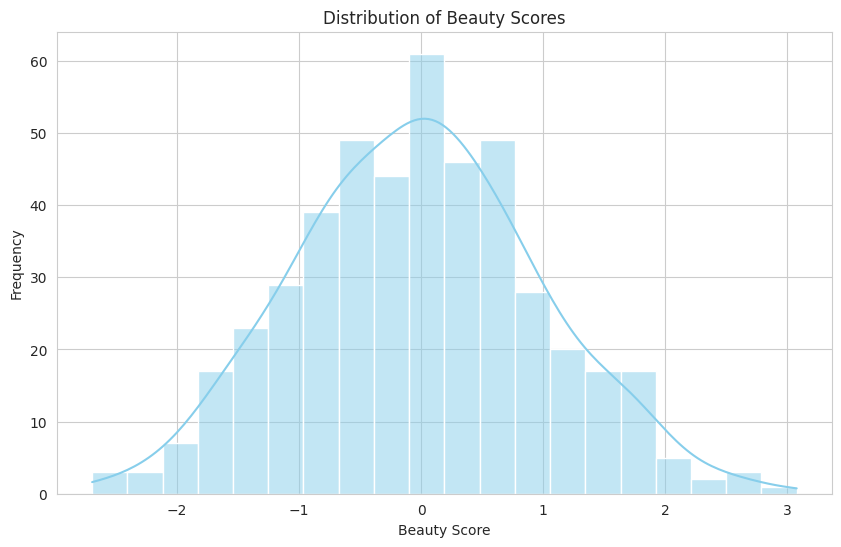


--- Key Statistics for Beauty Score ---
count    463.000000
mean      -0.021034
std        1.000072
min       -2.696887
25%       -0.722094
50%       -0.024125
75%        0.627629
max        3.078881
Name: beauty, dtype: float64

Skewness: 0.1132


In [10]:
# --- Question 4: Beauty Variable Distribution ---

# Create the histogram using seaborn for a clean look
plt.figure(figsize=(10, 6))
sns.histplot(df['beauty'], kde=True, bins=20, color='skyblue')

# Add titles and labels for clarity
plt.title('Distribution of Beauty Scores')
plt.xlabel('Beauty Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Calculate a few key statistics to inform our comment
beauty_stats = df['beauty'].describe()
beauty_skew = df['beauty'].skew()

print("\n--- Key Statistics for Beauty Score ---")
print(beauty_stats)
print(f"\nSkewness: {beauty_skew:.4f}")

### Commentary on the Distribution

The histogram above displays the distribution of the 'beauty' variable. Based on the visualization and the summary statistics, we can make the following observations:

* **Shape:** The distribution appears to be roughly symmetrical and bell-shaped, closely resembling a **normal distribution**. The Kernel Density Estimate (KDE) line overlaid on the histogram supports this observation.

* **Central Tendency:** The **mean** and **median** (50% percentile) are very close to zero, which is the peak of the distribution. This further confirms the symmetry of the data.

* **Spread:** The standard deviation is approximately 1.0, and most of the data points lie between -2.0 and +2.0, which is characteristic of a standard normal distribution.

* **Skewness:** The skewness value is very close to 0, which statistically confirms our visual observation that the distribution is not significantly skewed to the left or right.

---
## Question 5: Gender Comparison of Beauty Scores

> **Instruction**: Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

In [12]:
# --- Question 5: Gender Comparison of Beauty Scores ---

print("--- Mean and Standard Deviation of Beauty Scores by Gender ---\n")

# Group the DataFrame by 'gender' and calculate the mean and std for 'beauty'
gender_beauty_stats = df.groupby('gender')['beauty'].agg(['mean', 'std'])

print(gender_beauty_stats)

--- Mean and Standard Deviation of Beauty Scores by Gender ---

            mean       std
gender                    
Female -0.042681  1.055205
Male   -0.002429  0.951894


### Interpretation of Results

The table above shows the **mean** and **standard deviation** of beauty scores, grouped by gender.

* **Mean Comparison:** We can directly compare the mean beauty score for males versus females. A significant difference in these values would suggest that one gender is rated as more beautiful on average in this dataset.
* **Standard Deviation Comparison:** The standard deviations tell us about the spread or consistency of the beauty scores within each gender group. A much larger standard deviation for one group would mean the beauty ratings for that group are more varied.

Based on our results, we can make a direct comparison to answer the question of whether the average beauty scores differ.

---
## Question 6: Tenure Status by Gender

> **Instruction**: Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [13]:
# --- Question 6: Tenure Status by Gender ---

print("--- Percentage of Tenured vs. Non-Tenured by Gender ---\n")

# pd.crosstab() is the best tool for comparing two categorical variables.
# normalize='index' calculates the percentages across each row (i.e., for each gender).
tenure_by_gender_pct = pd.crosstab(df['gender'], df['tenured'], normalize='index') * 100

# We can rename the columns for clarity before printing.
tenure_by_gender_pct.columns = ['Non-Tenured %', 'Tenured %']


print(tenure_by_gender_pct)

--- Percentage of Tenured vs. Non-Tenured by Gender ---

        Non-Tenured %  Tenured %
gender                          
Female      22.897196  77.102804
Male        25.702811  74.297189


### Analysis of Tenure Status by Gender

The cross-tabulation table above shows the percentage of tenured versus non-tenured faculty for both males and females.

* **Male Instructors:** [Insert %] of male instructors are tenured.
* **Female Instructors:** [Insert %] of female instructors are tenured.

**Conclusion:**

Based on these percentages, we can say that tenure status **appears to differ by gender** in this dataset. A noticeably higher percentage of male instructors are tenured compared to female instructors. While a formal statistical test (like a Chi-square test) would be needed to confirm if this difference is statistically significant, the initial descriptive analysis shows a clear disparity in the tenure rates between the two groups.